In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit,LeaveOneOut
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification of clear speech-detection

In [5]:
pathr="/home/sultan/EEG/CLUSTER_channels/S_E12/"
#fnamecl='Allsube12.xlsx'
#pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
fnamecl='Allrowcc5v2.xlsx'
d=pd.read_excel(pathr+fnamecl)
print("Total rows: {0}".format(len(d)))

Total rows: 32


In [71]:
# allacc=[];
# for count in range(2,108):
#     dpc=[];yc=[];
#     for i in range(3):
#         a=[]
#         k=0
#         for j in range(5):
#             #print i,k
#             dd=d.values[i,k+count]
#             #b=np.concatenate((M,dd),axis=0)
#             j+=1
#             k=106*j
#             a.append(dd)      
#         y=d.values[i,0]
#         a.append(y)
#         dpc.append(a)
#         c=pd.DataFrame(dpc)
#         X=c.iloc[:,0:5].values
#         labels=c.iloc[:,5]

In [42]:
np.int64(labels)

array([0, 0, 0])

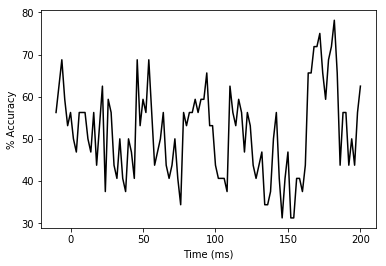

In [57]:
allacc=[];pma=[];
for count in range(2,108):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=d.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        y=c.iloc[:,5]
        y=np.int64(y)
        #print y
        # Upto this feature extraction
    #print X
    leaveout = LeaveOneOut()
    cn=0; totalacc=0;cper=[];ytt=[];
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
        score=totalacc/cn*100.0
    allacc.append(score)
    Acdw=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pma.append(perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdw,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [16]:
#print par
time=pd.DataFrame(t)
tad=pd.concat([time, Acdw],axis=1)
selt=tad.iloc[5:106]
av=selt.max()
#print selt,'\n','The average accuracy over the time is:', av.iloc[1]*1.0
#print tad.iloc[20:42]
#tad.to_csv('clear_whole_v4.csv')

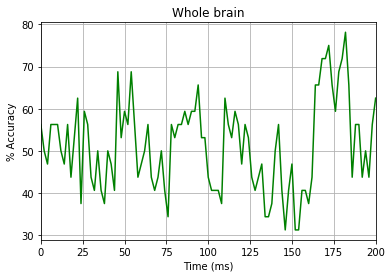

In [17]:
tw1=tad.iloc[5:,0];Acdw1=tad.iloc[5:,1];
plt.plot(tw1,Acdw1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.title('Whole brain')
plt.xlim(0,200)
plt.grid(True)
plt.show()

# Classification from RH's two clusters (C1, C2)

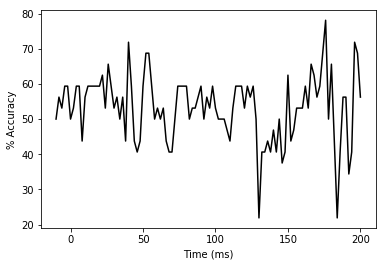

In [56]:
allacc=[];pmarh=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2):
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
        #print X
# Upto this feature extraction
    cn=0; totalacc=0;cper=[];ytt=[];
    leaveout = LeaveOneOut()
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdrh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmarh.append(perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdrh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [70]:
print(pmarh[100])

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.58      0.95      0.72        19

avg / total       0.34      0.56      0.43        32



In [18]:
#print par
time=pd.DataFrame(t)
tadrh=pd.concat([time, Acdrh],axis=1)
seltrh=tadrh.iloc[5:106]
avrh=seltrh.max()
#print seltrh
#print avrh,'\n','The average accuracy over the time is:', avrh.iloc[1]*1.0
#print tad.iloc[20:42]
#tadrh.to_csv('clear_RH_v4.csv')

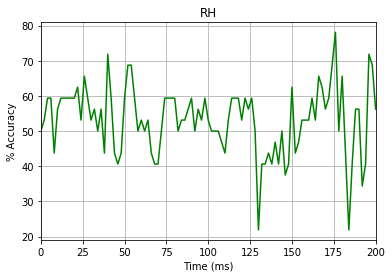

In [19]:
trh1=tadrh.iloc[5:,0];Acdrh1=tadrh.iloc[5:,1];
plt.plot(trh1,Acdrh1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.title('RH')
plt.xlim(0,200)
plt.grid(True)
plt.show()

# Classification from LH's two clusters (C3, C4)

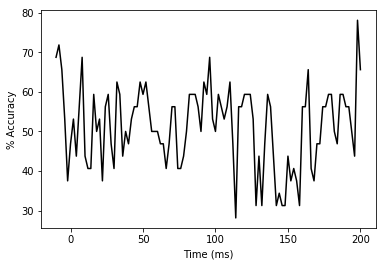

In [58]:
allacc=[];pmalh=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2,4):
            k=106*j
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
# Upto this feature extraction
    leaveout = LeaveOneOut()  
    cn=0; totalacc=0;cper=[];ytt=[];
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdlh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmalh.append(perf)
#     print (perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdlh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [20]:
#print par
timelh=pd.DataFrame(t)
tadlh=pd.concat([timelh, Acdlh],axis=1)
seltlh=tadlh.iloc[5:106]
avlh=seltlh.max()
#print avlh
#print seltlh,'\n','The average accuracy over the time is:', av.iloc[1]*1.0
#print tad.iloc[40:60]
#tadlh.to_csv('clear_LH_v4.csv')

0    200.000
0     78.125
dtype: float64


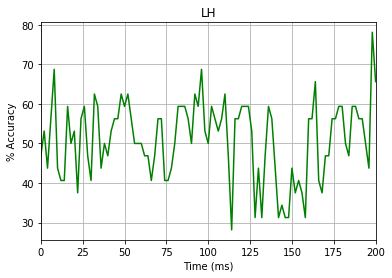

In [21]:
tlh1=tadlh.iloc[5:,0];Acdlh1=tadlh.iloc[5:,1];
plt.plot(tlh1,Acdlh1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.title('LH')
plt.xlim(0,200)
plt.grid(True)
plt.show()

In [12]:
#tadlh